<a href="https://colab.research.google.com/github/RobJavVar/DataSciencePsychNeuro/blob/master/ExerciseSubmissions/07_linear-models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 7:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository.


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework datasets/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file.

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame.

In [6]:
# Set working directory
setwd("/Users/belinda/Desktop/85403/GitHub/DataSciencePsychNeuro/Exercise datasets/hcp_data")

# Load the data
df <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")

# Look at the first few rows of the full dataframe
head(df)

# Load tidyverse
library(tidyverse)

# Create d1 with selected columns and remove NA values
d1 <- df %>%
  select(Subject, Gender, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol) %>%
  drop_na()

# Look at the first few rows of d1
head(d1)

,Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,⋯,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,100004,S900,Q06,M,22-25,29,8,1,2,2,⋯,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
2,100206,S900,Q11,M,26-30,30,6,1,1,1,⋯,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
3,100307,Q1,Q01,F,26-30,29,4,1,0,1,⋯,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
4,100408,Q3,Q03,M,31-35,30,4,1,1,0,⋯,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
5,100610,S900,Q08,M,26-30,30,4,1,1,0,⋯,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
6,101006,S500,Q06,F,31-35,28,2,1,1,0,⋯,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80


,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<int>,<int>
1,100206,M,130.42,543134,807245
2,100307,F,112.56,407292,664124
3,100408,M,121.18,500417,726206
4,100610,M,126.53,512946,762308
5,101006,F,101.85,429449,579632
6,101107,M,107.04,416995,665024


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

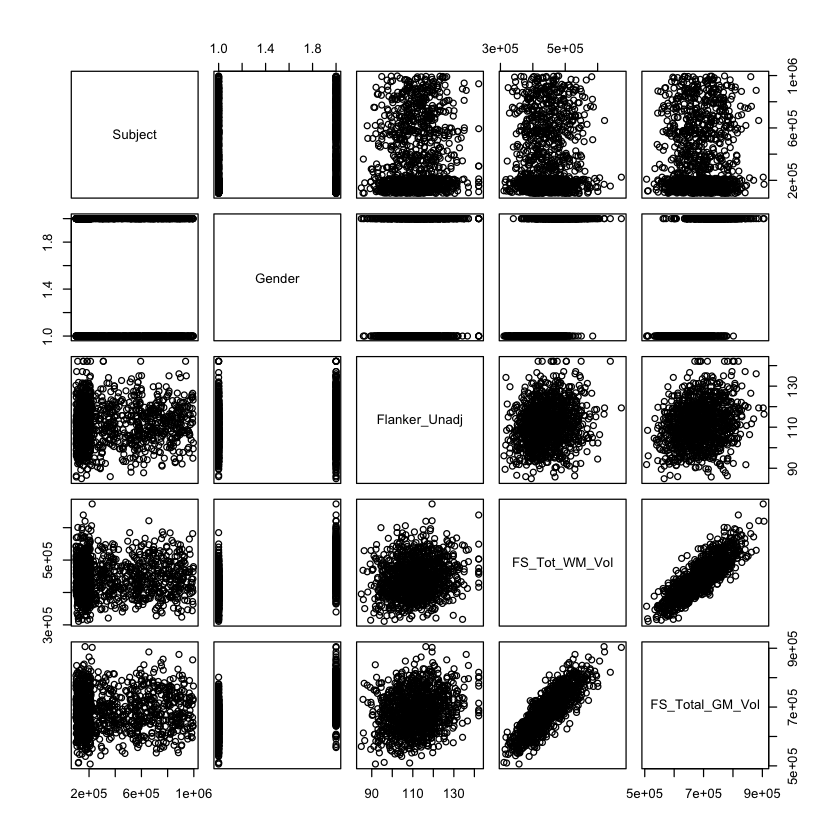

In [10]:
# Convert Gender to numeric and create pairwise scatterplots for all variables in d1.
pairs(d1 %>% mutate(Gender = as.numeric(as.factor(Gender))))

> *Write your response here.*
>
> The total white matter volume (FS_Tot_WM_Vol) and total grey matter volume (FS_Total_GM_Vol) show a strong positive correlation, as white matter volumn increases, grey matter volumn increases as well.
>
> Flanker Task performance (Flanker_Unadj) appear to have very weak or even no positive correlation with both total white matter volume (FS_Tot_WM_Vol) and total grey matter volume (FS_Total_GM_Vol). I think there may be a very small positive tendency, but it is clearly very noisy and not as nearly as strong as the WM-GM positive relationship.
>
> Gender, which is coded as numeric but in fact being a categorical variable, forms two bands here. There is not a clear linear relationship here with both Flanker or brain volumns in this plot, but as more of group clustering. However, I did notice that Gender appears to show a very slight increasement with both FS_Tot_WM_Vol and FS_Total_GM_Vol, suggesting that one gender group tends to have higher brain volumes than the other. But I am not sure if this is sufficient to be labled as positive relationship since Gender itself is not a continuous measurement, so it would be meaningless to label that.
>
> Subject variable showed no correlation with any of other variables, which make sense since it is not interpretable and it is simply an identification number.
>
> There are no obvious negative correlations among these variables in the scatterplots.

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [11]:
# Fit linear regression model: Flanker ~ Grey Matter Volume
model1 <- lm(Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

# Show full summary of the model
summary(model1)

# Report mean coefficient values (beta_0 and beta_1)
coef(model1)

# Report 95% confidence intervals for the coefficients
confint(model1)


Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


(Intercept) FS_Total_GM_Vol 
   9.025646e+01    3.109965e-05

,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


> *Write your response here.*
>
> This linear regression model predicts Flanker Task performance from total grey matter volume, and found that grey matter volumn showed a positive association with Flanker performance. And this association is statistically significant. The intercept ($\beta_0$) is 90.26 [95% CI: 84.29, 96.22] and the slope ($\beta_1$) for grey matter volume is 3.110e-05 [95% CI: 2.24e-05, 3.98e-05]. The p-value for the grey matter volume coefficient is 3.18e-12, which is far below a $\alpha = 0.05$ significance level. And also since the 95% CI for $\beta_1$ does not include 0, these results suggest that grey matter colume is significantly associated with Flanker task performance with higher grey matter volume predicting slightly higher Flanker scores (since every unit increase in grey matter volume, Flanker performance increases by approximately 3.11e-05 points). 

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see.

`geom_smooth()` using formula = 'y ~ x'


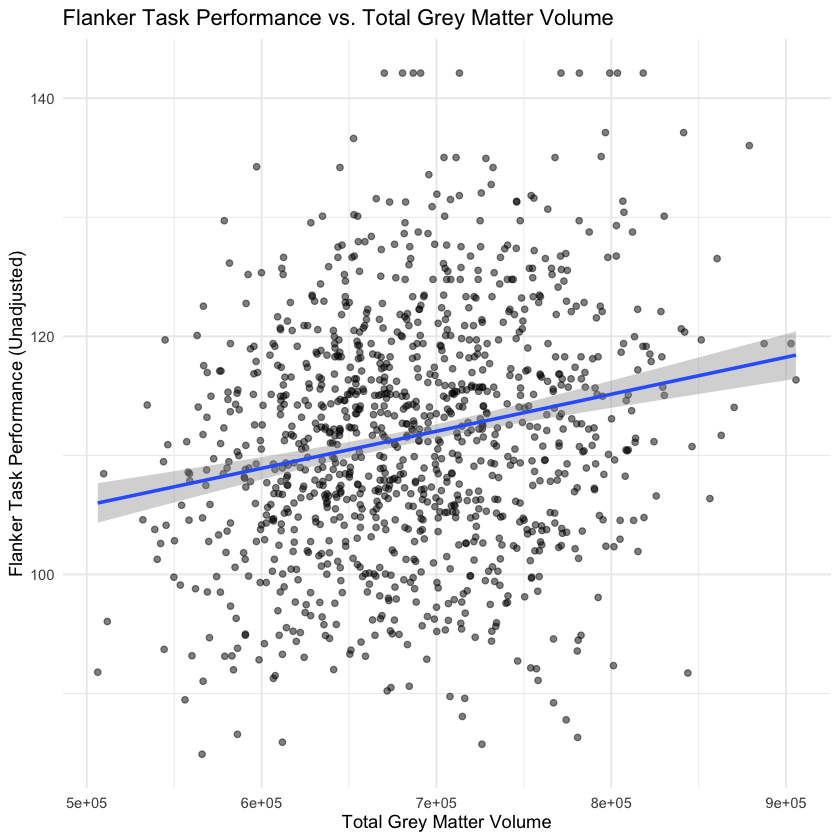

In [12]:
# Scatterplot with regression line and confidence interval
ggplot(d1, aes(x = FS_Total_GM_Vol, y = Flanker_Unadj)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", se = TRUE) +
  labs(x = "Total Grey Matter Volume", y = "Flanker Task Performance (Unadjusted)",
       title = "Flanker Task Performance vs. Total Grey Matter Volume") +
  theme_minimal()

> *Write your response here.*
>
> The scatterplot shows a slight positive trend between total grey matter volumne and Flanker task performance. This is indicated in the figure by the upward-sloping regression line. This mean that higher total gret matter volume is associated with higher Flanker performance on average. However, the data points are very widely scattered around the regression line, suggesting a weak relationship between the two variables. The confidence internal (shaded band) around the regression line is relatively narrow, which may be one of the byproduct of the large sample size. Though from the previous question we found that this is a statistically significant relationship, this plot shows that the grey matter is not very strong predictor of Flanker task performance, since there is substantial variability in Flanker scores at any given grey matter volume.

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

> *Write your response here.*
>
> Based on the above analyses, there is a statistically significant positive association between total grey matter volume and Flanker task performance (p = 3.18e-12). However, the practical significance of this relationship is limited. The R-sqaured value around 0.04 indicates that grey matter cvolumn accounts for only approximately 4.2% of the variance in Flanker performance, leaving the vast majority of variance still unexplianed. This idea is also shown in the scatter plot above, where data points are very widely scattered around the regression line despite the fact that there exists a significant positive slope. So while individuals with larger grey matter volumnes are assocaited with slightly higher scores in Flanker tasks, the grey matter volume alone is a poor predictor of Flanker task perfoemance. Other factors, such as white matter volume, age, education, etc, likely also play a role in explaining individual differences in exective functions such as perfoemances in Flanker task. So my personal takeaway is that we should be causious for the distinction between statistical significance and practical significance. Sometimes when something is statistically significant, we still need to interpret that with careful and remember that it does not necessarily mean they have to also be strong indicators / predictors of the other variable in practice.

**DUE:** 5pm EST, Feb 19, 2026

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*